In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Mostrar a evolução das exportações mensais e anuais totais do Brasil (todos os estados e para todo o mundo) de 'soja', 'óleo de soja' e 'farelo de soja';

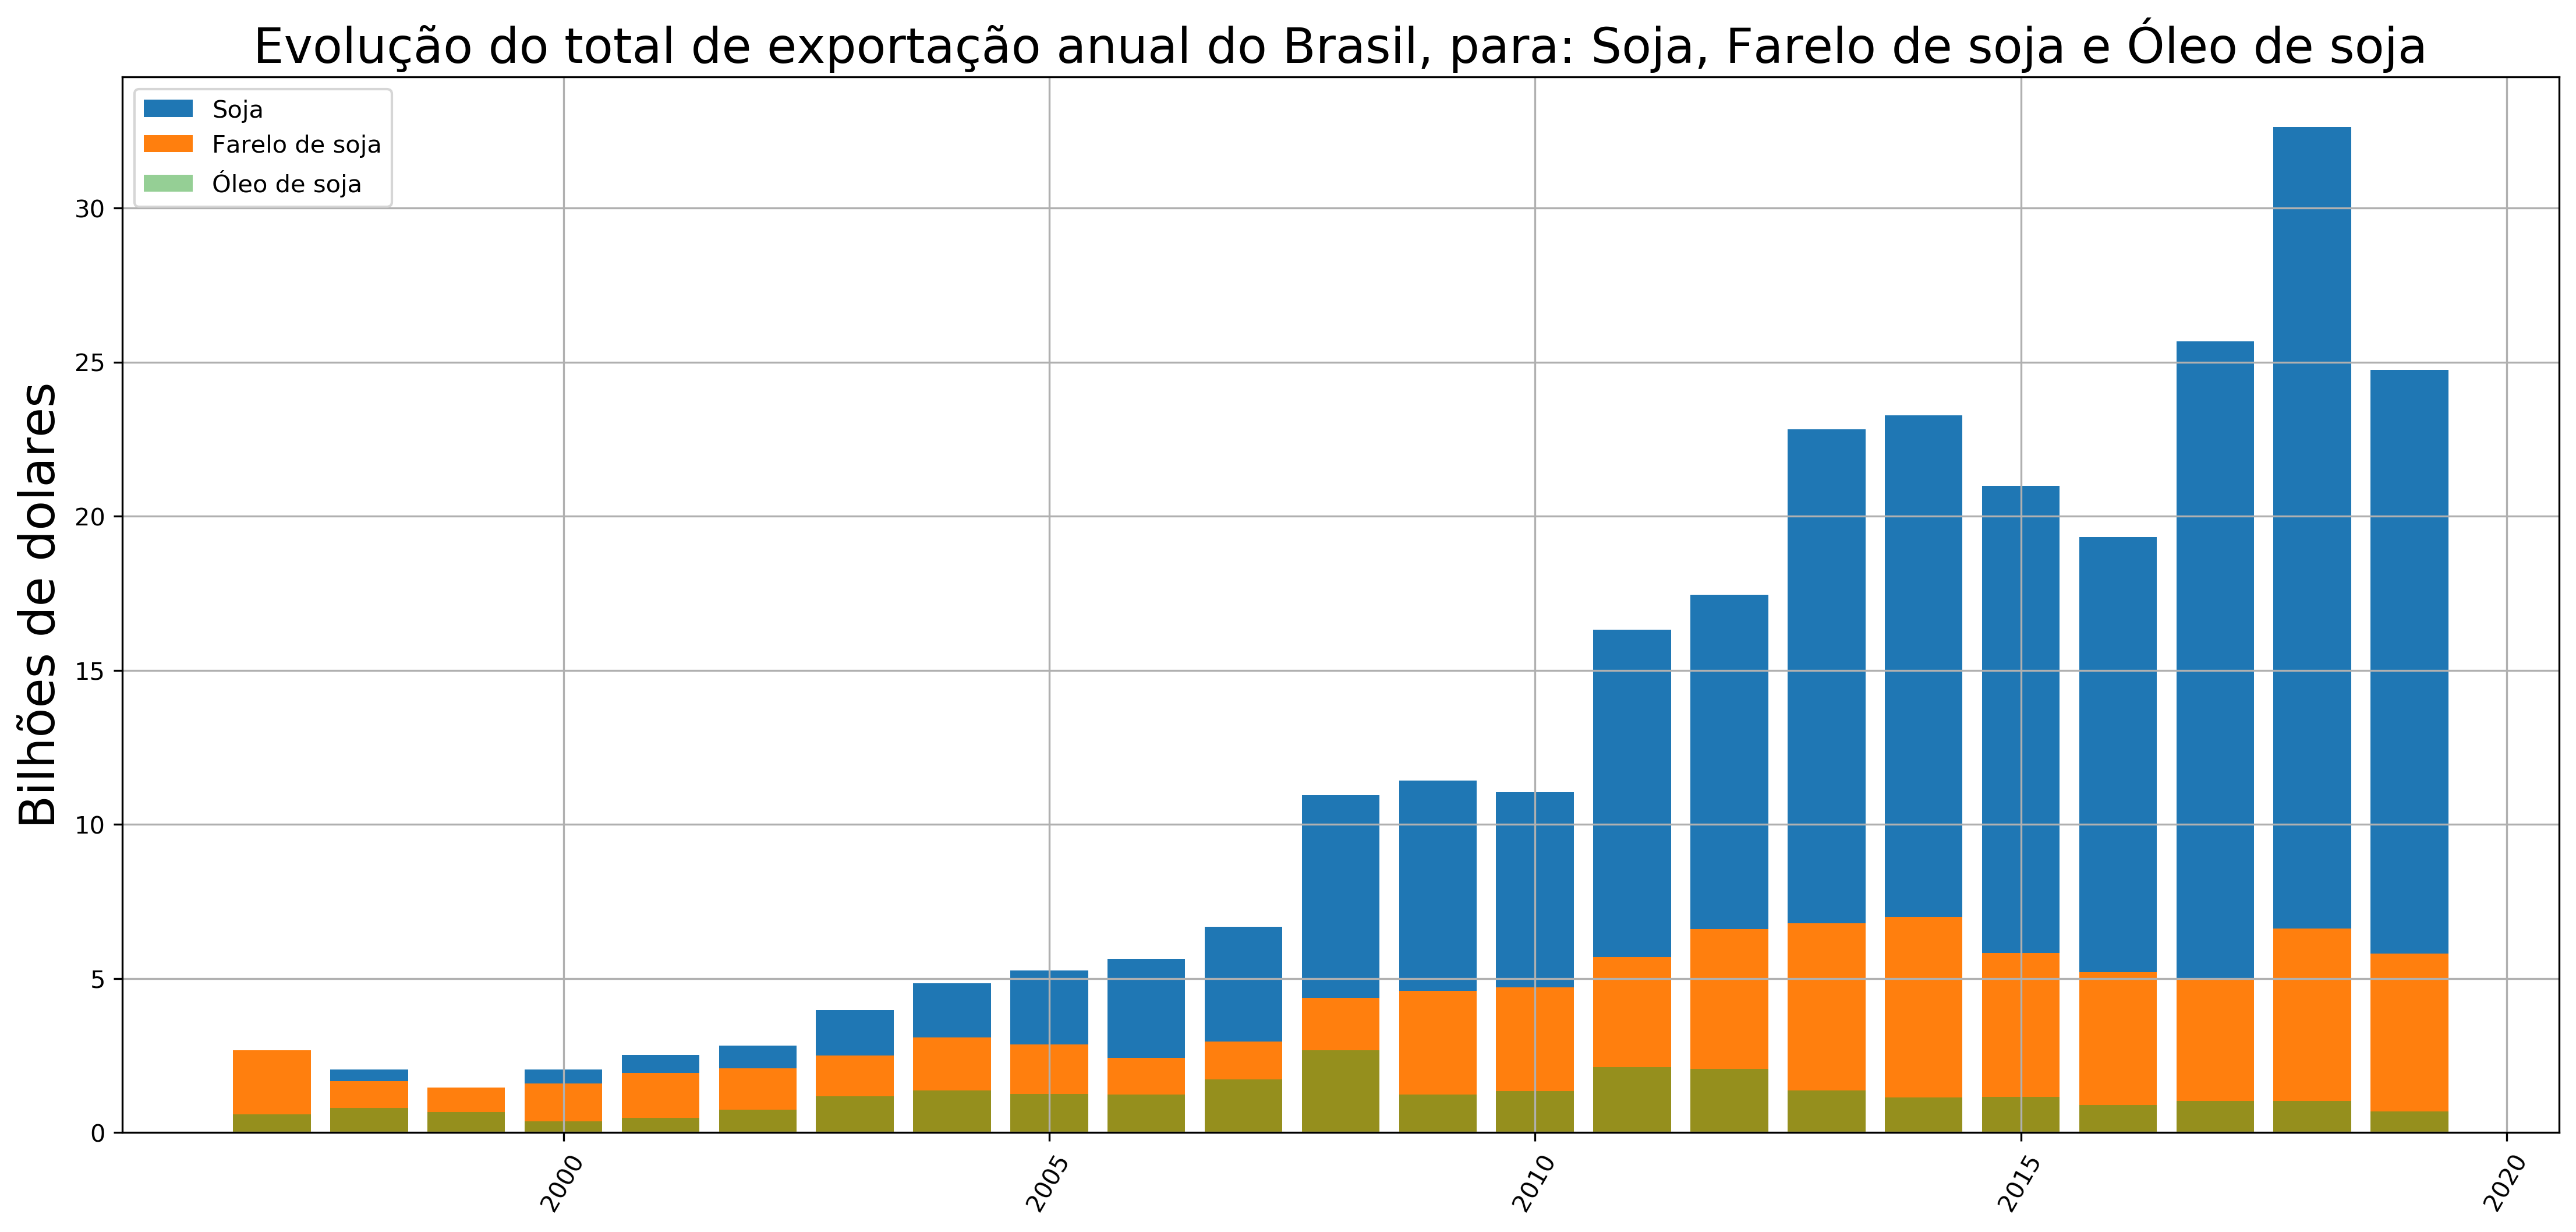

In [2]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado = dado[dado.type=='Export']
dado = dado.groupby([dado.index.year,'product']).sum()
soybeans = dado[dado.index.get_level_values(1)=="soybeans"]
soybean_meal = dado[dado.index.get_level_values(1)=="soybean_meal"]
soybean_oil = dado[dado.index.get_level_values(1)=="soybean_oil"]

plt.figure(dpi=300)

x=list(soybeans.index.get_level_values(0))
y=list(soybeans.usd/1000000000)
plt.bar(x,y, alpha=1, label='Soja')

x=list(soybean_meal.index.get_level_values(0))
y=list(soybean_meal.usd/1000000000)
plt.bar(x,y, alpha=1, label='Farelo de soja')

x=list(soybean_oil.index.get_level_values(0))
y=list(soybean_oil.usd/1000000000)
plt.bar(x,y, alpha=0.5, label='Óleo de soja')

plt.grid()
plt.legend()
plt.title('Evolução do total de exportação anual do Brasil, para: Soja, Farelo de soja e Óleo de soja',fontsize=20)
plt.ylabel('Bilhões de dolares',fontsize=20)
plt.xticks(rotation=60);

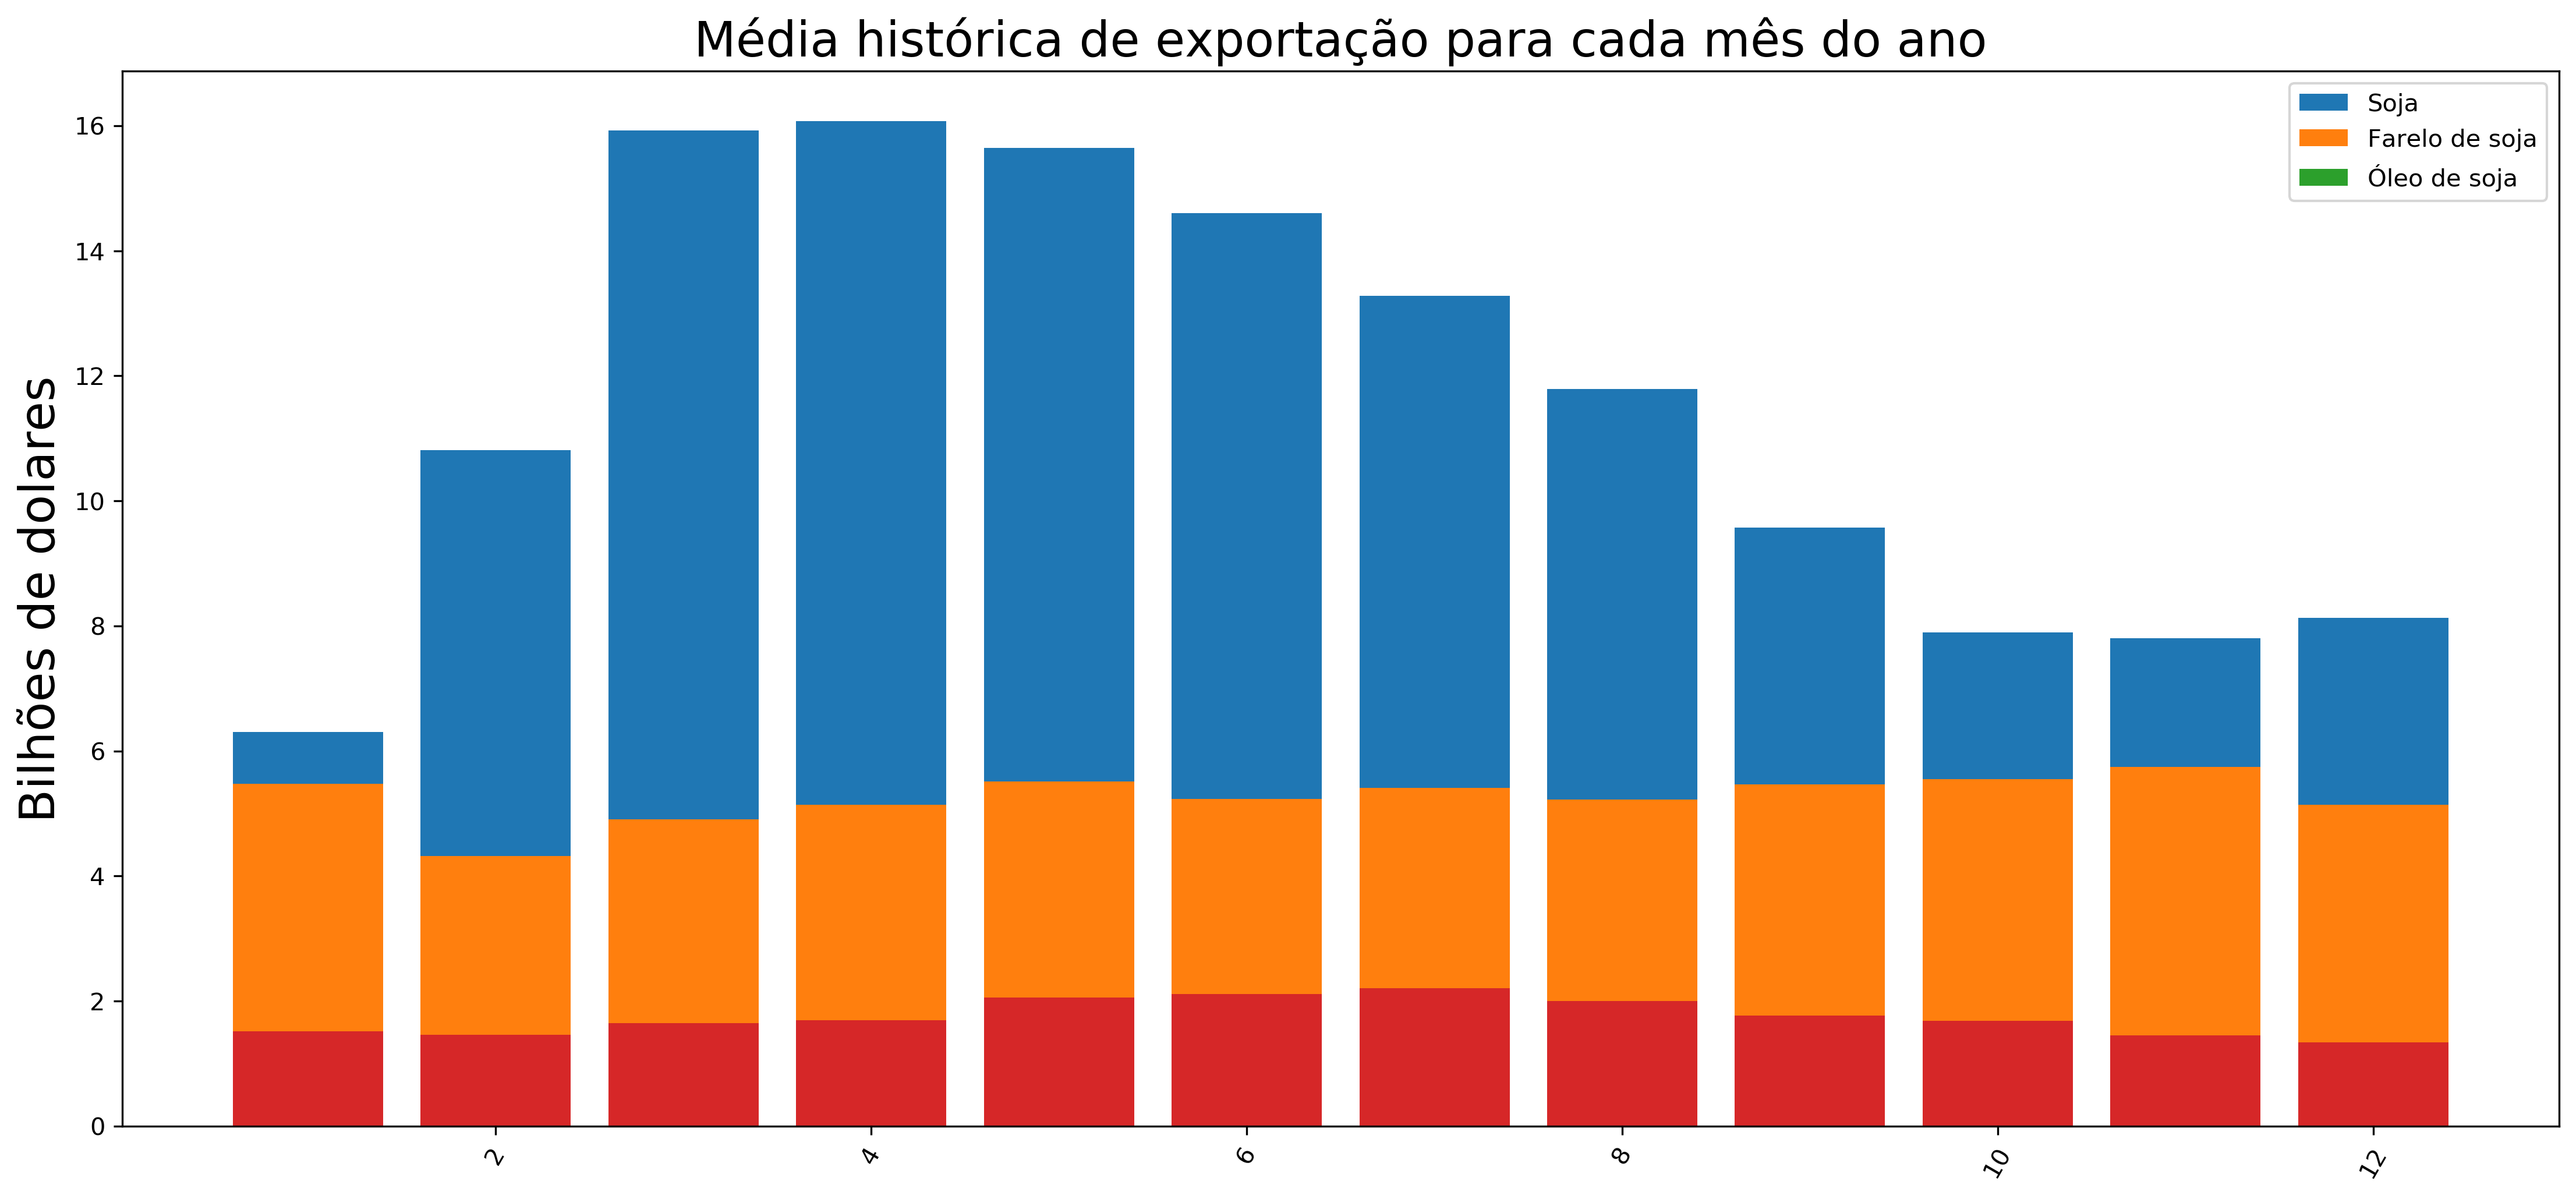

In [117]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado = dado[dado.type=='Export']
dado = dado.groupby([dado.index.month,'product']).mean()
soybeans = dado[dado.index.get_level_values(1)=="soybeans"]
soybean_meal = dado[dado.index.get_level_values(1)=="soybean_meal"]
soybean_oil = dado[dado.index.get_level_values(1)=="soybean_oil"]
plt.figure(dpi=300)

x=list(soybeans.index.get_level_values(0))
y=list(soybeans.usd/1000000)
plt.bar(x,y, alpha=1, label='Soja')

x=list(soybean_meal.index.get_level_values(0))
y=list(soybean_meal.usd/1000000)
plt.bar(x,y, alpha=1, label='Farelo de soja')

x=list(soybean_oil.index.get_level_values(0))
y=list(soybean_oil.usd/1000000)
plt.bar(x,y,  label='Óleo de soja')


plt.legend()
plt.bar(x,y)
plt.title('Média histórica de exportação para cada mês do ano',fontsize=20)
plt.ylabel('Bilhões de dolares',fontsize=20)
plt.xticks(rotation=60);

# Quais os países que foram os parceiros comerciais mais importantes para o Brasil em termos de 'milho' e 'açúcar' nos últimos 3 anos?

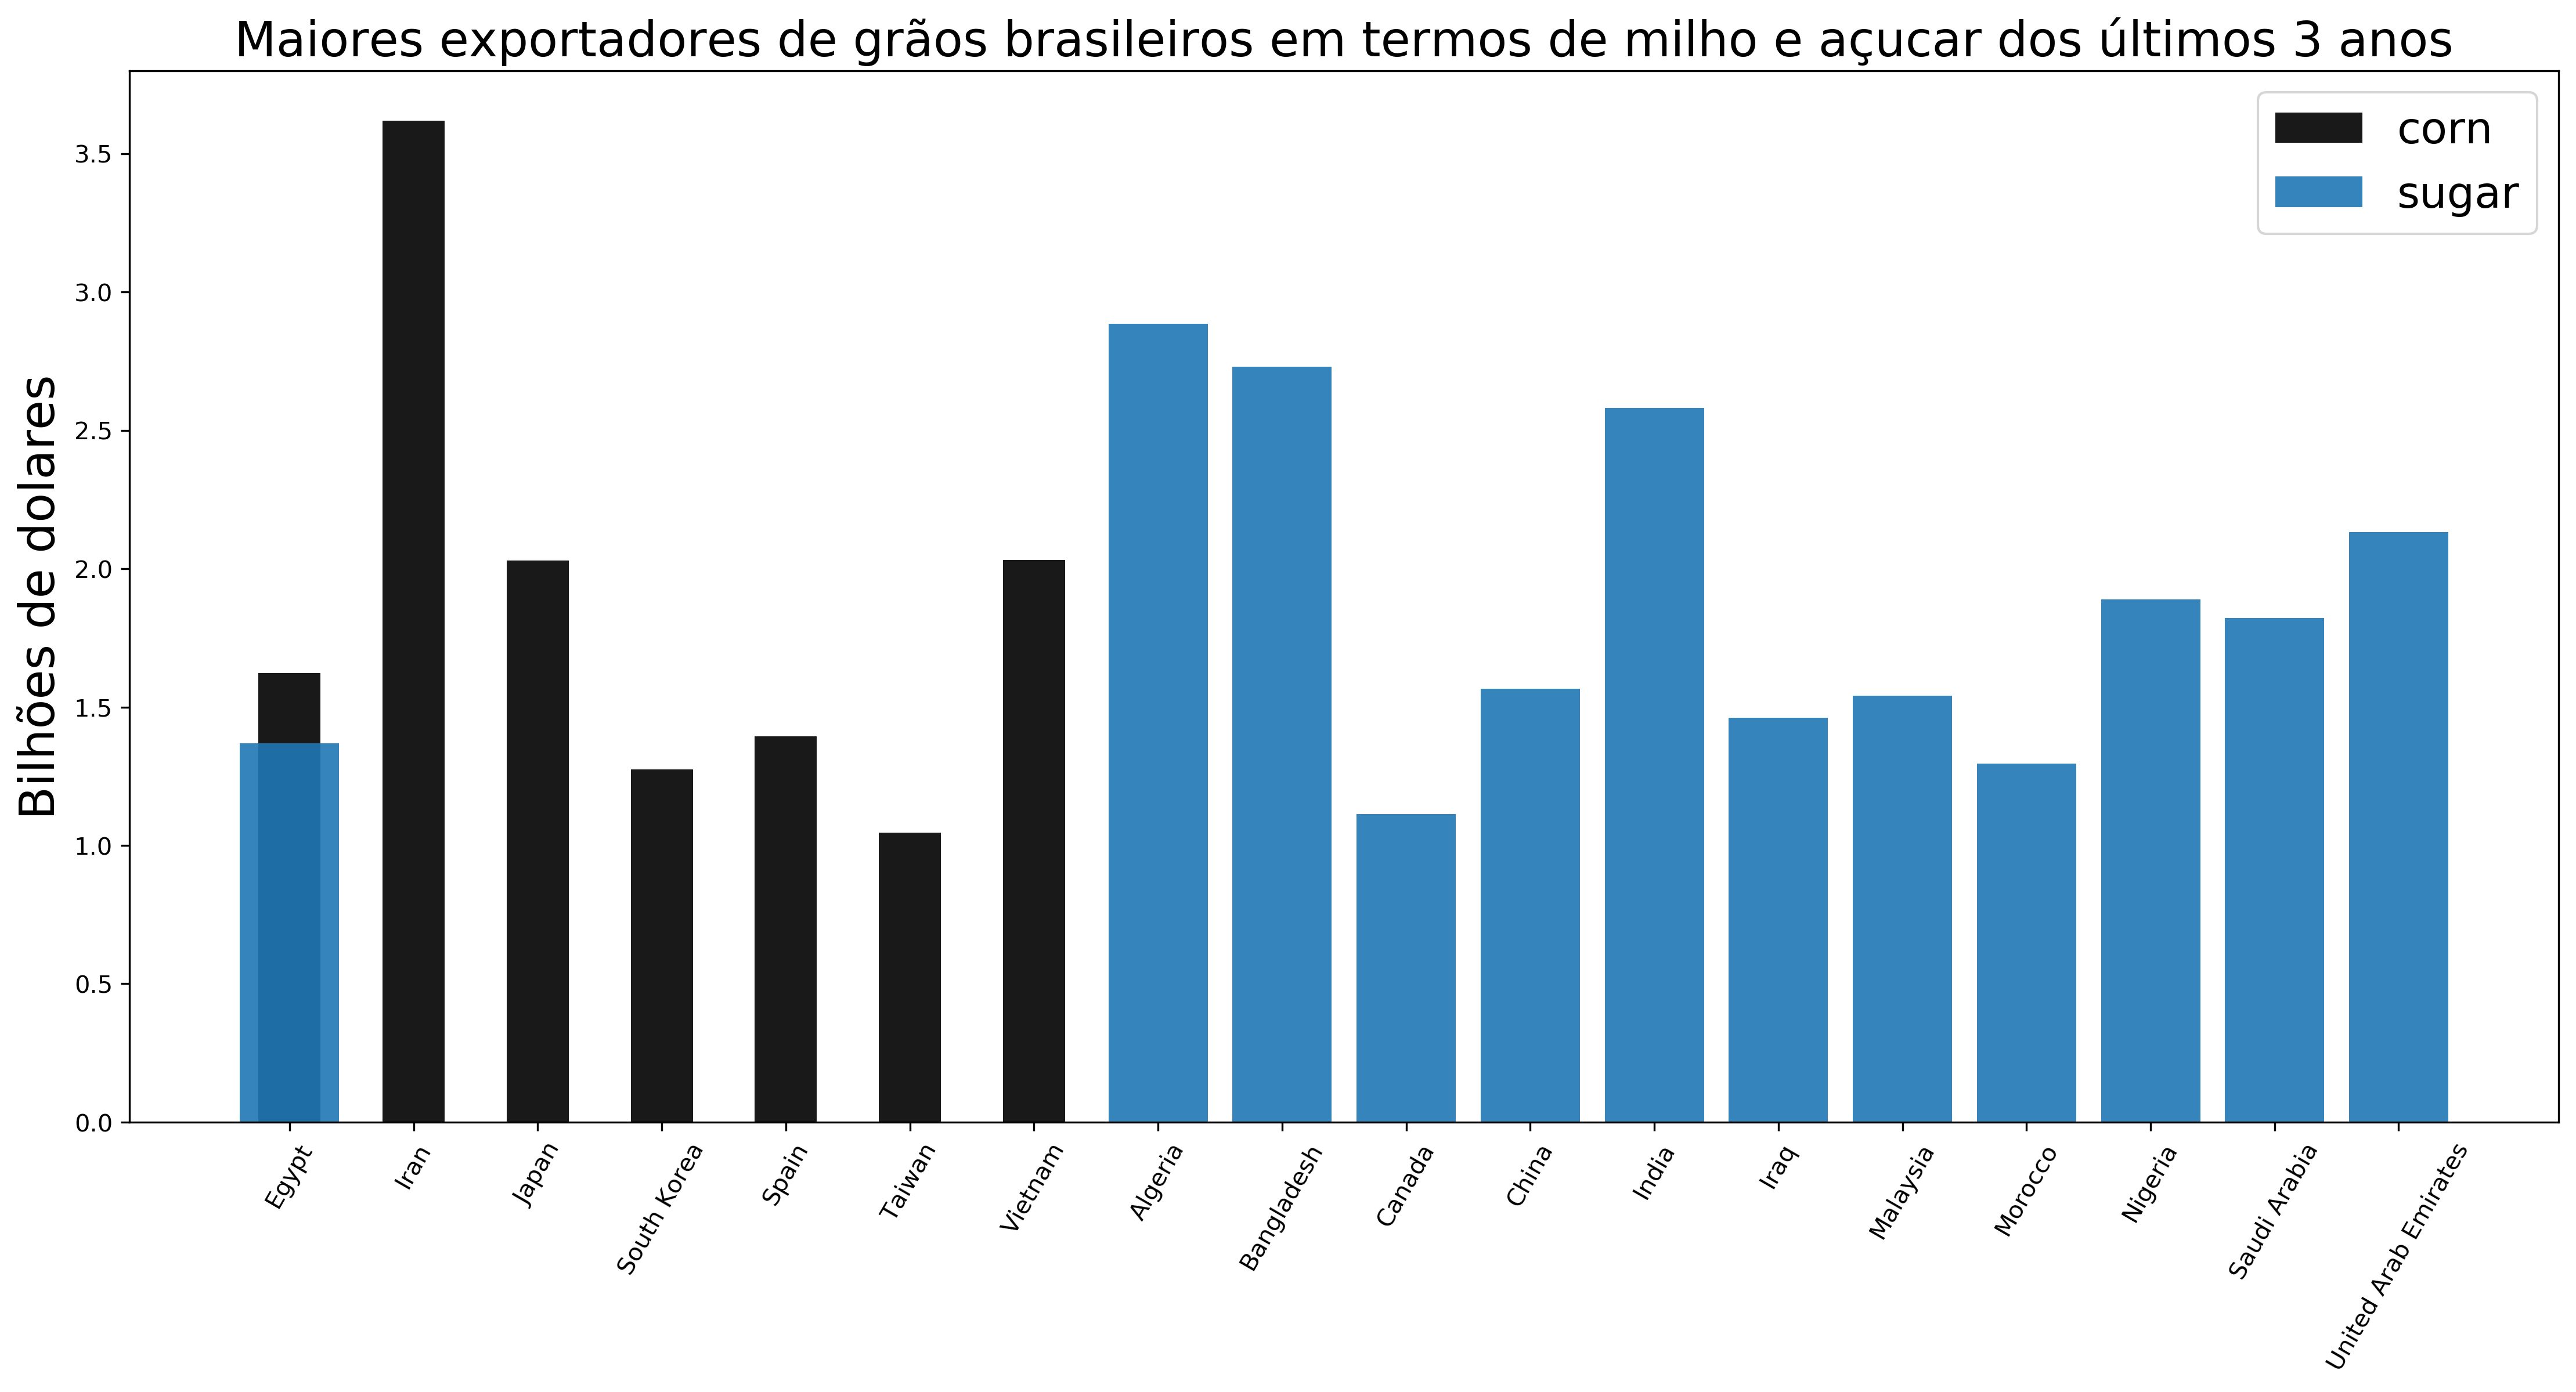

In [4]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado = dado[dado.type=='Export']
three_years = dado.loc['2016':'2019']
three_years = three_years.groupby(['country','product']).sum()
df = three_years[(three_years.index.get_level_values(1)=="corn")&(three_years.usd>=1000000000)]
x=list(df.index.get_level_values(0))
y=list(df.usd/1000000000)
df2 = three_years[(three_years.index.get_level_values(1)=="sugar")&(three_years.usd>=1000000000)]
x2=list(df2.index.get_level_values(0))
y2=list(df2.usd/1000000000)
plt.figure(dpi=300)

plt.bar(x,y, width=0.5, color='black', label='corn', alpha=0.9)
plt.bar(x2,y2,label='sugar',alpha=0.9)
plt.legend(fontsize=18)
plt.title('Maiores exportadores de grãos brasileiros em termos de milho e açucar dos últimos 3 anos',fontsize=20)
plt.ylabel('Bilhões de dolares',fontsize=20)
plt.xticks(rotation=60);

# Quais são os 3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos?

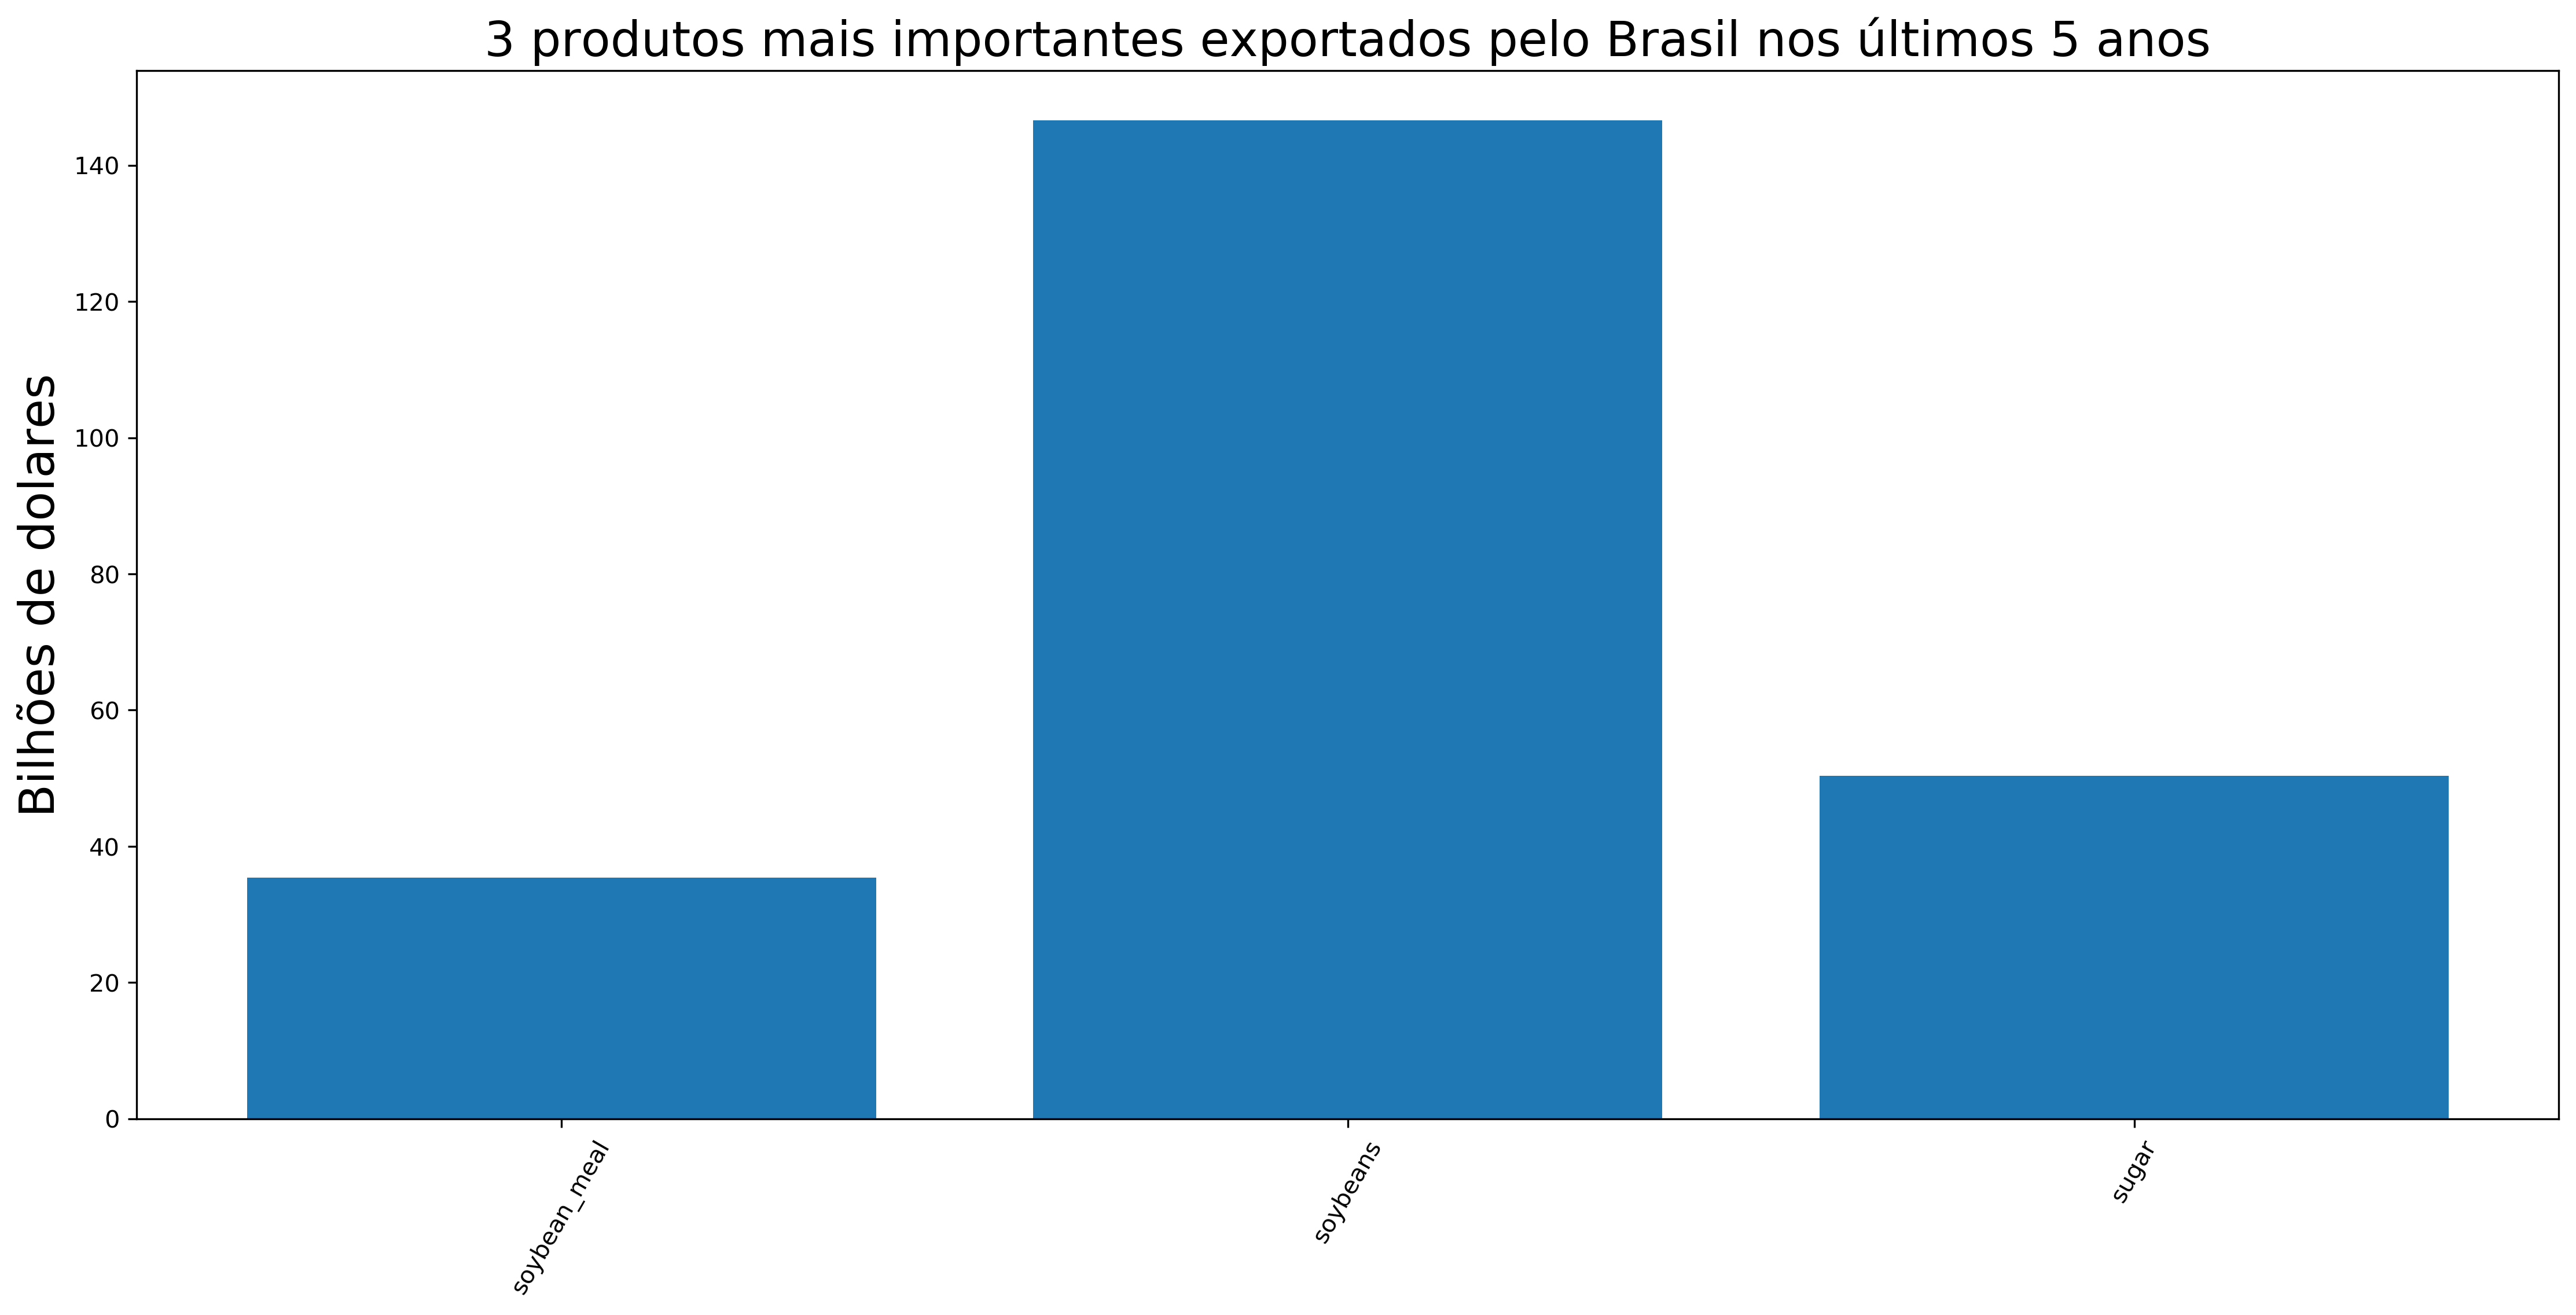

In [5]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado = dado[dado.type=='Export']
five_years = dado.loc['2014':'2019']
five_years = five_years.groupby(['product']).sum()
df = five_years[(five_years.usd>=30000000000)]
x=list(df.index)
y=list(df.usd/1000000000)
plt.figure(dpi=300)

plt.bar(x,y)
plt.title('3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos',fontsize=20)
plt.ylabel('Bilhões de dolares',fontsize=20)
plt.xticks(rotation=60);

# Quais são as principais rotas pelas quais o Brasil exporta 'milho' nos últimos anos? Existem diferenças na importância relativa das rotas, dependendo do produto?

In [122]:

dado.groupby([dado.route,dado.product]).sum()

tons           usd
route  product                                 
Air    corn          1.197716e+04  1.489480e+07
       soybean_meal  2.222997e+04  8.307999e+06
       soybean_oil   3.945030e+02  3.018420e+05
       soybeans      1.440480e+02  2.291540e+05
       sugar         2.735309e+03  1.018166e+06
       wheat         1.407000e+00  2.450000e+03
Ground corn          2.307217e+05  4.963856e+08
       soybean_meal  2.871014e+04  1.081066e+07
       soybean_oil   3.025440e+05  3.046557e+08
       soybeans      4.356439e+05  1.644130e+08
       sugar         1.329746e+06  5.073994e+08
       wheat         4.981800e+04  1.571609e+07
Other  corn          2.735719e+05  4.585836e+07
       soybean_meal  9.149718e+04  3.053705e+07
       soybean_oil   1.126463e+05  1.022077e+08
       soybeans      1.519121e+06  5.424047e+08
       sugar         1.543462e+05  5.970834e+07
       wheat         1.598300e+01  2.305500e+04
River  corn          9.101066e+06  1.666881e+09
       soybean_meal  5.009874e+05  7.182727e+07
       soybean_oil   2.733133e+04  2.599640e+07
       soybeans      1.947989e+07  7.206393e+09
       sugar         3.056069e+05  1.039980e+08
Sea    corn          2.693056e+08  4.974177e+10
       soybean_meal  2.971799e+08  9.323588e+10
       soybean_oil   3.854841e+07  2.665026e+10
       soybeans      7.125239e+08  2.683255e+11
       sugar         2.701670e+08  9.739610e+10
       wheat         7.602722e+06  1.752153e+09

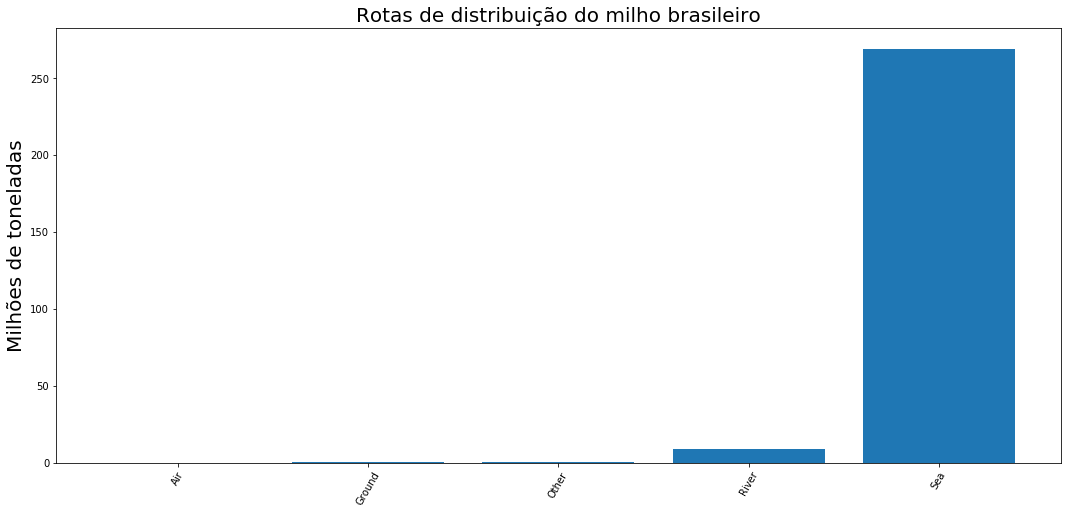

In [123]:
# Quais são as principais rotas pelas quais o Brasil exporta 'milho' nos últimos anos?
# Existem diferenças na importância relativa das rotas, dependendo do produto?
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado = dado[dado.type=='Export']
dado.product = dado.iloc[:,0]
dado = dado.groupby([dado.route,dado.product]).sum()
dado = dado[dado.index.get_level_values(1)=='corn']
x=list(dado.index.get_level_values(0))
y=dado.tons/1000000
plt.bar(x,y)
plt.title('Rotas de distribuição do milho brasileiro',fontsize=20)
plt.ylabel('Milhões de toneladas',fontsize=20)
plt.xticks(rotation=60);
plt.show()

In [141]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado = dado[dado.type=='Export']
dado.product = dado.iloc[:,0]
prods = list(set(prods))

dado = dado.groupby([dado.product,dado.state]).sum()
dado = dado.sort_values(by=['product','usd'])
dado[dado.index.get_level_values(0)=="wheat"].sort_values('usd')

tons           usd
product state                           
wheat   DF           0.120  5.900000e+01
        MA           0.002  6.400000e+01
        ES           0.180  3.300000e+02
        RO           1.870  3.275000e+03
        GO          39.782  1.634900e+04
        RJ          23.637  3.124800e+04
        MG         217.911  3.960000e+04
        MS         910.108  2.757330e+05
        SP       10066.817  2.267024e+06
        SC       81340.920  2.540009e+07
        PR      824974.624  1.839354e+08
        RS     6734981.032  1.555925e+09

In [130]:
produtos

'soybean_oil'

# Para cada um dos produtos do conjunto de dados, mostre os 5 estados mais importantes em termos de exportação?

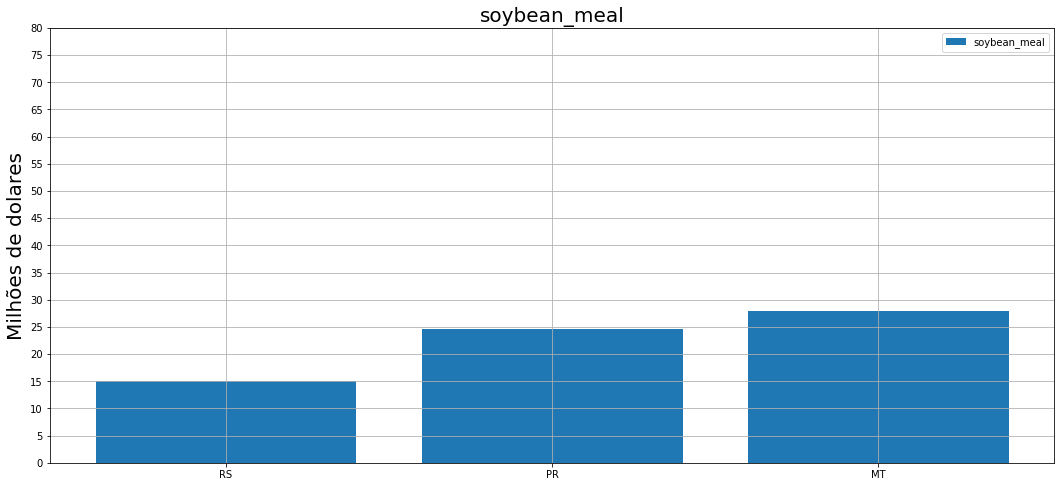

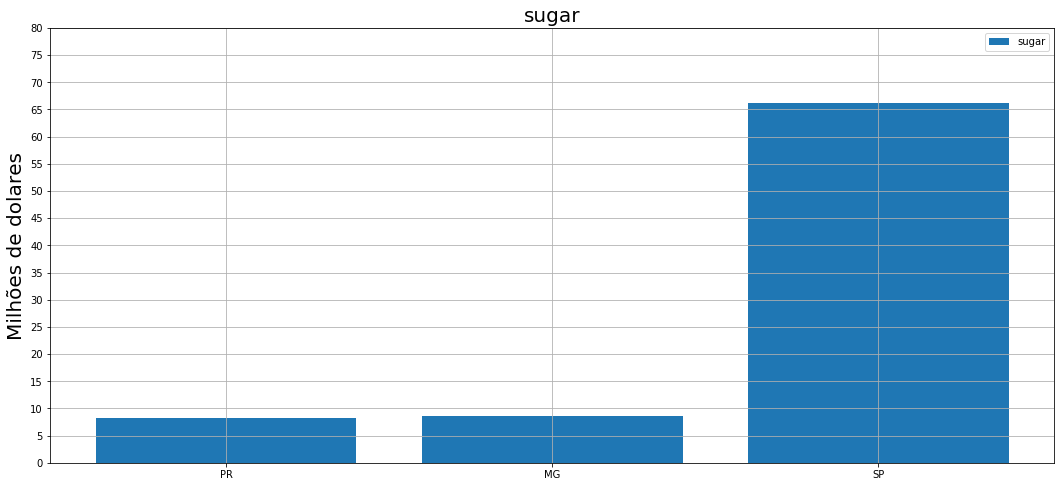

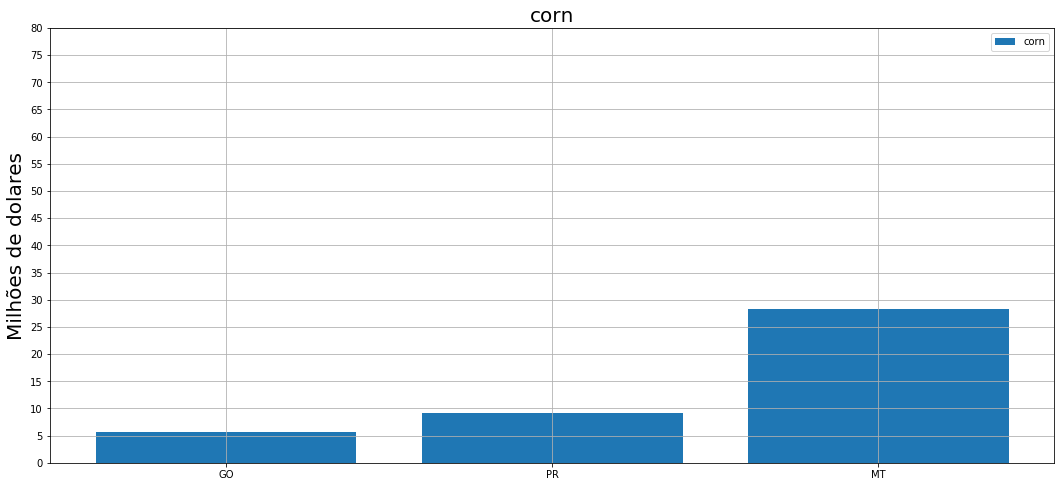

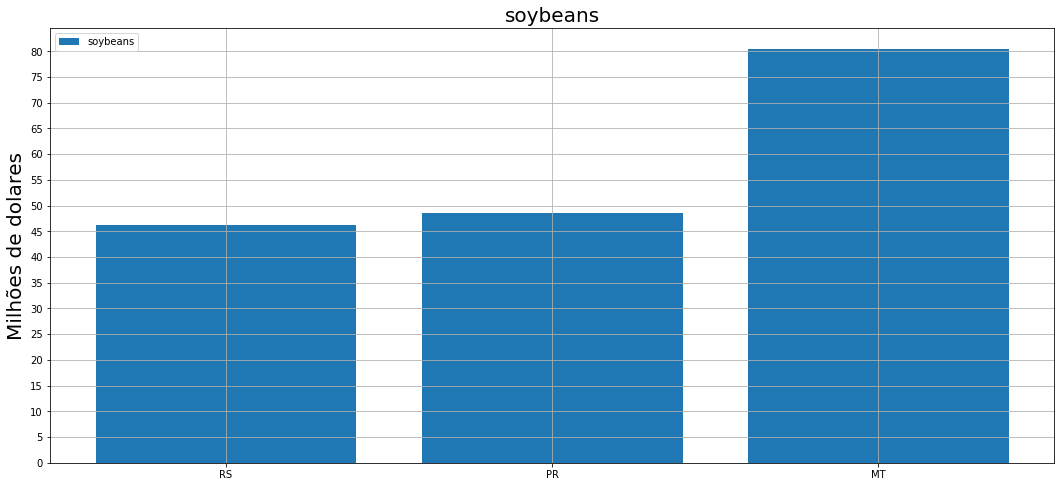

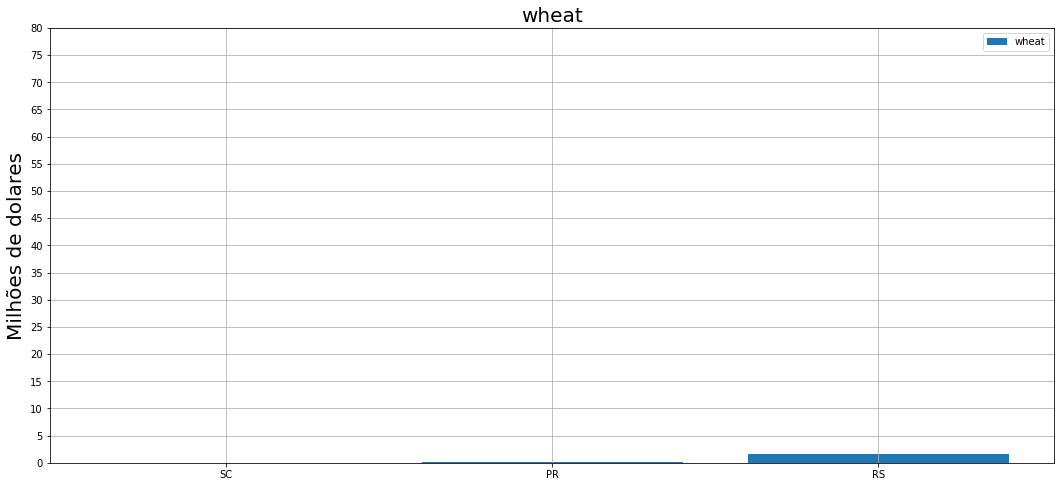

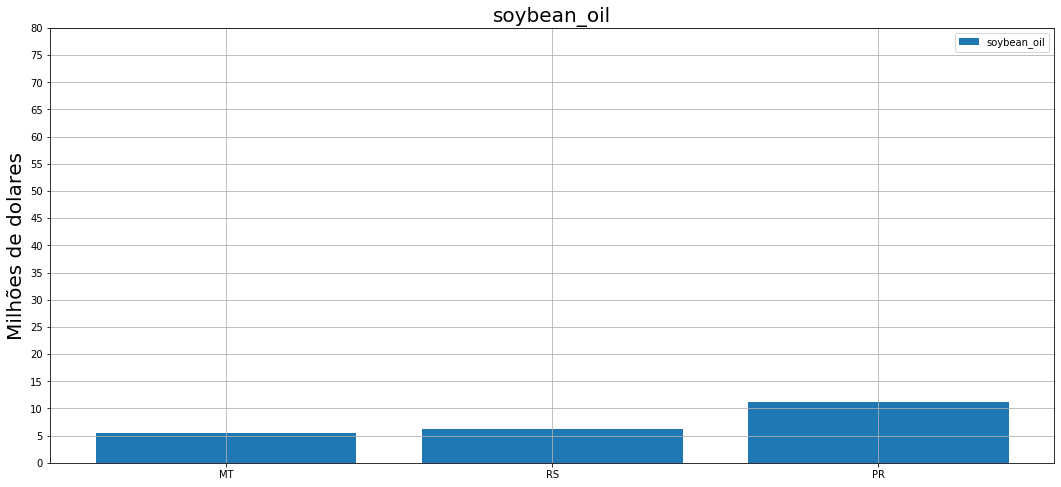

In [125]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado = dado[dado.type=='Export']
dado.product = dado.iloc[:,0]
prods = list(set(prods))

dado = dado.groupby([dado.product,dado.state]).sum()
dado = dado.sort_values(by=['product','usd'])


for produtos in prods:
    first_three = dado[dado.index.get_level_values(0)==produtos][-3:]
    
    x = list(first_three.index.get_level_values(1))
    y = first_three.usd.values/1000000000
    
    
    plt.bar(x,y, label='{}'.format(produtos))
    plt.yticks(np.arange(0,85,5))
    plt.ylabel('Milhões de dolares',fontsize=20)

    plt.legend()
    plt.grid()
    plt.title('{}'.format(produtos),fontsize=20)
    plt.show()